# IE30301 DataMining  Programming HW1

### Author: Eldor Fozilov

### * Import Packages
- It is not allowed for you to use packages other than specific packages below
- It is not nessasary to use all the packages below 
- For task 1.7, you need to use the package 'statsmodel.api'
- Both packages('sklearn.linear_model' and 'statsmodels.api') can be used to load linear regression model

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

## Task 1. Multiple linear regression [15 points]

#### 1.1 Load Dataset [1 points]

In [3]:
data = pd.read_csv("data/diabetes.csv")

#### 1.2 Split Dataset into the train & test set [1 points]
- You have to use the specified random seed when dividing the dataset using the package 'train_test_split'
- The specified random seed value is 0
- The ratio of train set and test set is as follows: 70% train set / 30% test set

In [4]:
# Before splitting the dataset, we will separate the target variable from the independent variables
y = data["target"]
X = data.drop(columns = "target")
# Now we will split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,test_size=0.3,random_state = 0)

#### 1.3 Preprocess the data (use standard scaling) [2 points]

In [5]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#### 1.4 Load model and train the model [2 points]
- Intercept term should be included for training

In [6]:
X_train_norm_new = sm.add_constant(X_train_norm)
model = sm.OLS(y_train,X_train_norm_new)
model = model.fit()

#### 1.5 Predict and evaluate the model [4 points]

- Predict target y using the trained model
- Evaluate the trained model using the two metrics (*it is not allowed to use packages for this task)
    1. mean squared error(MSE)
    2. R2 score
- Calculated scores should be placed in the specified cell

In [7]:
# prediction step 
X_test_norm_new = sm.add_constant(X_test_norm)
y_hat = model.predict(X_test_norm_new)

In [8]:
# calculate MSE using calculation code
errors = y_test-y_hat
N = X_test.shape[0]
MSE = np.dot(errors,errors) / N

In [9]:
# write calculated MSE value here in markdown mode
MSE

3097.1461383877977

#### Calculated MSE is 3097.1461383877977

In [10]:
# calculate R2 using calculation code
errors = y_test-y_hat
SSE = np.dot(errors,errors)
y_mean = np.mean(y_test)
SST = np.dot(y_test-y_mean, y_test-y_mean)
R_square = 1-(SSE/SST)

In [11]:
# write calculated R2 score here in markdown mode
R_square

0.3928939845074757

#### Calculated R2 score is 0.3928939845074757

#### 1.6 Describe the whole formula of the trained model [1 points]

In [12]:
# get coefficients for the whole formula
variables = ["const", *data.columns[0:-1]]
parameters = model.params
parameters.index = variables
print(parameters)

const    152.119741
age       -2.534069
sex       -9.214721
bmi       27.982947
bp        12.988312
s1       -23.912969
s2        11.501656
s3        -3.362391
s4         4.236574
s5        35.443348
s6         1.366687
dtype: float64


In [13]:
# write down the whole formula

#### Whole formula is 
$$ \hat{y} = 152.119741 - 2.534069\,\textit{age} - 9.214721\,\textit{sex} + 27.982947\,\textit{bmi} + 12.988312\,\textit{bp} - 23.912969\,\textit{s2} + 11.501656\,\textit{s1} - 3.362391\,\textit{s3} + 4.236574\,\textit{s4} + 35.443348\,\textit{s5} + 1.366687\,\textit{s6}$$

#### 1.7 Check the p-value and find out significant variables [4 points]
- Print p-value of each variable 
- List all variables judged to be significant based on the p-value 0.05 

In [14]:
# get p-value of each variable
pvalues = model.pvalues
variables = ["const", *data.columns[0:-1]]
pvalues.index = variables
print(pvalues)

const    5.224475e-146
age       4.621128e-01
sex       7.598006e-03
bmi       3.094248e-12
bp        8.941189e-04
s1        2.998056e-01
s2        5.345449e-01
s3        7.837443e-01
s4        6.539856e-01
s5        2.935403e-04
s6        7.251985e-01
dtype: float64


In [15]:
# write significant variables list
pvalues[pvalues<0.05]

const    5.224475e-146
sex       7.598006e-03
bmi       3.094248e-12
bp        8.941189e-04
s5        2.935403e-04
dtype: float64

#### Significant variabels list : [sex, bmi, bp, s5]

## Task 2. Simple linear regression [15 points]

#### 2.1 Select one feature using information of p-value [1 points]
- Select one of the variables judged to be significant in task 1.7 and mention the variable name you choose
- Remake a dataset only including the variable you choose

#### Selected variable : bmi

#### 2.2 Split Dataset into the train & test set [1 points]
- To perform this task, you need to use the reconstructed dataset in task 2.1
- You have to use the specified random seed when dividing the dataset using the package 'train_test_split'
- The specified random seed value is 0
- The ratio of train set and test set is as follows: 70% train set / 30% test set

In [16]:
X_single = pd.DataFrame(data['bmi'])
X_train_single, X_test_single, y_train_single, y_test_single = \
train_test_split(X_single,y,train_size = 0.7,test_size=0.3,random_state = 0)

#### 2.3 Preprocess the data (use standard scaling) [2 points]

In [17]:
scaler = StandardScaler()
X_train_single_norm = scaler.fit_transform(X_train_single)
X_test_single_norm = scaler.transform(X_test_single)

#### 2.4 Load model and train the model [2 points]
- Intercept term should be included for training

In [18]:
X_train_single_norm_new = sm.add_constant(X_train_single_norm)
model_single = sm.OLS(y_train_single, X_train_single_norm_new)
model_single = model_single.fit()

#### 2.5 Predict and evaluate the results [4 points]

- Predict target y using the trained model
- Evaluate the trained model using the two metrics (*it is not allowed to use packages for this task)
    1. mean squared error(MSE)
    2. R2 score
- Calculated scores should be placed in the specified cell

In [19]:
# predict 
X_test_single_norm_new = sm.add_constant(X_test_single_norm)
y_hat_single = model_single.predict(X_test_single_norm_new)

In [20]:
# calculate MSE using calculation code
errors = y_test_single-y_hat_single
N = X_test_single.shape[0]
MSE = np.dot(errors,errors) / N

In [21]:
# write calculated MSE value here in markdown mode
print(MSE)

3921.372027424852


#### Calculated MSE is 3921.372027424852

In [22]:
# calculate R2 using calculation code
errors = y_test_single-y_hat_single
SSE = np.dot(errors,errors)
y_mean_single = np.mean(y_test_single)
SST = np.dot(y_test_single - y_mean_single, y_test_single - y_mean_single)
R_square = 1-(SSE/SST)

In [23]:
# write calculated R2 score here in markdown mode
R_square

0.23132831307953794

#### Calculated R2 score is 0.23132831307953794

#### 2.6 Describe the whole formula of the trained model [1 points]

In [24]:
# get coefficients for the whole formula
print(model_single.params)

const    152.119741
x1        48.925670
dtype: float64


In [25]:
# write down the whole formula

#### Whole formula is 
$$ \hat{y} = 152.119741 + 48.92567\,\textit{bmi} $$

#### 2.7 Plot graph [4 points]
- Plot data points of test set and draw the line you get from the trained model 

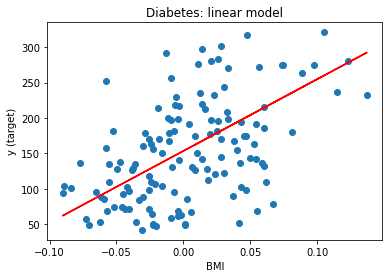

In [26]:
plt.scatter(X_test_single, y_test_single)
plt.plot(X_test_single, y_hat_single, 'r')
plt.title('Diabetes: linear model')
plt.xlabel('BMI')
plt.ylabel('y (target)')

plt.show()
